In [113]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [114]:
# Input any natural number and transform it into binary

number = 1400
secretnumber = "{0:b}".format(number)

# For a secret number of length n
# "n (n-1) ... 2 1 0" corresponding qubit labels order

In [123]:
# Initialize the circuit and gates 

circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

# Perform the algorithm

for counter, value in enumerate(reversed(secretnumber)):
    if value == "1":
        circuit.cx(counter, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

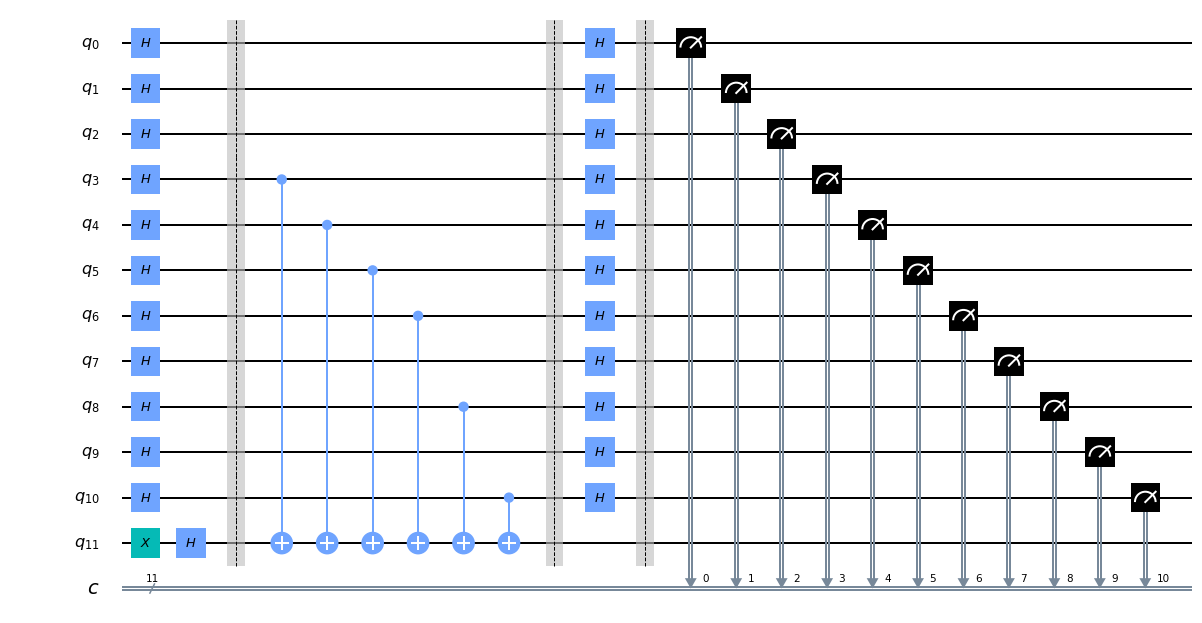

In [122]:
circuit.draw(output = "mpl")

In [121]:
# Execute the simulation

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = simulator, shots = 1).result()

# Determine the string predicted by the quantum algorithm in 1 try

counts = result.get_counts()
print("The number you were thinking of was " + str(int(list(counts)[0], 2)) + ". This is " + str(list(counts)[0]) + " in binary. Thanks for playing!")

The number you were thinking of was 1400. This is 10101111000 in binary. Thanks for playing!
